## EDA of dataset with client information

### Features description
- **id**: the application ID. The applications are numbered so that the larger
number corresponds to the later date of the application.
- **rn**: the serial number of the credit product in the credit history.
The larger number corresponds to a product with a later opening date.
- **pre_since_opened** : the number of days from the date of loan opening to the date
of data collection.
- **pre_since_confirmed** : the number of days from the date of confirmation
of the loan information to the date of data collection.
- **pre_pterm** : the planned number of days from the opening date of the loan to
the closing date.
- **pre_fterm** : the actual number of days from the opening date of the loan to
the closing date.
- **pre_till_pclose** : the planned number of days from the date of data collection to the date
of closing of the loan.
- **pre_till_fclose** : the actual number of days from the date of data collection to
the closing date of the loan.
- **pre_loans_credit_limit** : credit limit.
- **pre_loans_next_pay_summ** : the amount of the next loan payment.
- **pre_loans_outstanding** : remaining unpaid loan amount.
- **pre_loans_total_overdue** : current overdue debt
- **pre_loans_max_overdue_sum** : the maximum overdue debt.
- **pre_loans_credit_cost_rate** : the full cost of the loan.
- **pre_loans5** : the number of delays up to 5 days.
- **pre_loans530** : the number of delays from 5 to 30 days.
- **pre_loans3060** : the number of delays from 30 to 60 days.
- **pre_loans6090** : the number of delays from 60 to 90 days.
- **pre_loans90** : the number of delays of more than 90 days.
- ***Above features are  binarized***
- **is_zero_loans_5** : flag: no delays of up to 5 days.
- **is_zero_loans_530** : flag: no delays from 5 to 30 days.
- **is_zero_loans_3060** : flag: no delays from 30 to 60 days.
- **is_zero_loans_6090** : flag: no delays from 60 to 90 days.
- **is_zero_loans90** : flag: there are no delays of more than 90 days.
- **pre_util** : the ratio of the remaining unpaid loan amount to the credit limit.
- **pre_over2limit** : the ratio of the current overdue debt to the credit limit.
- **pre_maxover2limit** — the ratio of the maximum overdue debt to the credit limit.
- **is_zero_util** : flag: the ratio of the remaining unpaid loan amount to the credit limit is 0.
- **is_zero_over2limit** : flag: the ratio of the current overdue debt to the credit limit is 0.
- **is_zero_maxover2limit** : flag: the ratio of the maximum overdue debt to the credit limit is 0.
- **enc_paym_{0..N}** : monthly payment statuses for the last N months (encoded**).
- **enc_loans_account_holder_type** : the type of relationship to the loan (encoded**)
- **enc_loans_credit_status** : credit status (encoded**).
- **enc_loans_account_cur** : is the currency of the loan (encoded**).
- **enc_loans_credit_type** : the type of loan (encoded**).
- **pclose_flag** : flag: the planned number of days from the opening date of the loan to the closing date is not defined.
- **fclose_flag** : flag: the actual number of days from the opening date of the loan to the closing date is not determined.

## Data uploading

In [1]:
path = 'train_data/'
import os
import pandas as pd
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def read_parquet_dataset_from_local(path_to_dataset: str, start_from: int = 0,
                                        num_parts_to_read: int = 2, columns=None, verbose=False) -> pd.DataFrame:

            res = []
            dataset_paths = sorted([os.path.join(path_to_dataset, filename) for filename in os.listdir(path_to_dataset)
                                if filename.startswith('train')])
            print(dataset_paths)

            start_from = max(0, start_from)
            chunks = dataset_paths[start_from: start_from + num_parts_to_read]
            if verbose:
                print('Reading chunks:\n')
                for chunk in chunks:
                    print(chunk)
            for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):
                print('chunk_path', chunk_path)
                chunk = pd.read_parquet(chunk_path, columns=columns)
                res.append(chunk)

            return pd.concat(res).reset_index(drop=True)

In [9]:
def prepare_transactions_dataset(path_to_dataset: str, num_parts_to_preprocess_at_once: int = 2,
                                     num_parts_total: int = 50,
                                     save_to_path=None, verbose: bool = False):
            preprocessed_frames = []

            for step in tqdm.tqdm_notebook(range(0, num_parts_total, num_parts_to_preprocess_at_once),
                                       desc="Transforming transactions data"):
                transactions_frame = read_parquet_dataset_from_local(path_to_dataset, step
                                                                 , num_parts_to_preprocess_at_once, columns= None,
                                                                 verbose=verbose)

                if save_to_path:
                    block_as_str = str(step)
                    if len(block_as_str) == 1:
                        block_as_str = '00' + block_as_str
                    else:
                        block_as_str = '0' + block_as_str
                    transactions_frame.to_parquet(os.path.join(save_to_path, f'processed_chunk_{block_as_str}.parquet'))

                preprocessed_frames.append(transactions_frame)
            return pd.concat(preprocessed_frames)


In [10]:
data_all_1 = prepare_transactions_dataset(path, num_parts_to_preprocess_at_once=4, num_parts_total=2,
                                    save_to_path='train_data/')

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_90676/879082432.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm.tqdm_notebook(range(0, num_parts_total, num_parts_to_preprocess_at_once),


Transforming transactions data:   0%|          | 0/1 [00:00<?, ?it/s]

['train_data/train_data_0.pq', 'train_data/train_data_1.pq', 'train_data/train_data_10.pq', 'train_data/train_data_11.pq', 'train_data/train_data_2.pq', 'train_data/train_data_3.pq', 'train_data/train_data_4.pq', 'train_data/train_data_5.pq', 'train_data/train_data_6.pq', 'train_data/train_data_7.pq', 'train_data/train_data_8.pq', 'train_data/train_data_9.pq']


/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_90676/1317076487.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

chunk_path train_data/train_data_0.pq
chunk_path train_data/train_data_1.pq
chunk_path train_data/train_data_10.pq
chunk_path train_data/train_data_11.pq


In [11]:
def prepare_transactions_dataset(path_to_dataset: str, num_parts_to_preprocess_at_once: int = 2,
                                     num_parts_total: int = 50,
                                     save_to_path=None, verbose: bool = False):
            preprocessed_frames = []

            for step in tqdm.tqdm_notebook(range(0, num_parts_total, num_parts_to_preprocess_at_once),
                                       desc="Transforming transactions data"):
                transactions_frame = read_parquet_dataset_from_local(path_to_dataset, 5
                                                                 , num_parts_to_preprocess_at_once, columns= None,
                                                                 verbose=verbose)

                if save_to_path:
                    block_as_str = str(step)
                    if len(block_as_str) == 1:
                        block_as_str = '00' + block_as_str
                    else:
                        block_as_str = '0' + block_as_str
                    transactions_frame.to_parquet(os.path.join(save_to_path, f'processed_chunk_{block_as_str}.parquet'))

                preprocessed_frames.append(transactions_frame)
            return pd.concat(preprocessed_frames)


In [12]:
data_all_2 = prepare_transactions_dataset(path, num_parts_to_preprocess_at_once=4, num_parts_total=2,
                                    save_to_path='train_data/')

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_90676/1679609030.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm.tqdm_notebook(range(0, num_parts_total, num_parts_to_preprocess_at_once),


Transforming transactions data:   0%|          | 0/1 [00:00<?, ?it/s]

['train_data/train_data_0.pq', 'train_data/train_data_1.pq', 'train_data/train_data_10.pq', 'train_data/train_data_11.pq', 'train_data/train_data_2.pq', 'train_data/train_data_3.pq', 'train_data/train_data_4.pq', 'train_data/train_data_5.pq', 'train_data/train_data_6.pq', 'train_data/train_data_7.pq', 'train_data/train_data_8.pq', 'train_data/train_data_9.pq']


/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_90676/1317076487.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

chunk_path train_data/train_data_3.pq
chunk_path train_data/train_data_4.pq
chunk_path train_data/train_data_5.pq
chunk_path train_data/train_data_6.pq


In [14]:
def prepare_transactions_dataset(path_to_dataset: str, num_parts_to_preprocess_at_once: int = 2,
                                     num_parts_total: int = 50,
                                     save_to_path=None, verbose: bool = False):
            preprocessed_frames = []

            for step in tqdm.tqdm_notebook(range(0, num_parts_total, num_parts_to_preprocess_at_once),
                                       desc="Transforming transactions data"):
                transactions_frame = read_parquet_dataset_from_local(path_to_dataset, 8
                                                                 , num_parts_to_preprocess_at_once, columns= None,
                                                                 verbose=verbose)

                if save_to_path:
                    block_as_str = str(step)
                    if len(block_as_str) == 1:
                        block_as_str = '00' + block_as_str
                    else:
                        block_as_str = '0' + block_as_str
                    transactions_frame.to_parquet(os.path.join(save_to_path, f'processed_chunk_{block_as_str}.parquet'))

                preprocessed_frames.append(transactions_frame)
            return pd.concat(preprocessed_frames)


In [15]:
data_all_3 = prepare_transactions_dataset(path, num_parts_to_preprocess_at_once=4, num_parts_total=2,
                                    save_to_path='train_data/')

/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_90676/2991674154.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for step in tqdm.tqdm_notebook(range(0, num_parts_total, num_parts_to_preprocess_at_once),


Transforming transactions data:   0%|          | 0/1 [00:00<?, ?it/s]

['train_data/train_data_0.pq', 'train_data/train_data_1.pq', 'train_data/train_data_10.pq', 'train_data/train_data_11.pq', 'train_data/train_data_2.pq', 'train_data/train_data_3.pq', 'train_data/train_data_4.pq', 'train_data/train_data_5.pq', 'train_data/train_data_6.pq', 'train_data/train_data_7.pq', 'train_data/train_data_8.pq', 'train_data/train_data_9.pq']


/var/folders/nq/qpxp4yn91b7btxc8zx883d6r0000gn/T/ipykernel_90676/1317076487.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset with pandas"):


Reading dataset with pandas:   0%|          | 0/4 [00:00<?, ?it/s]

chunk_path train_data/train_data_6.pq
chunk_path train_data/train_data_7.pq
chunk_path train_data/train_data_8.pq
chunk_path train_data/train_data_9.pq


In [3]:
targets = pd.read_csv('train_target.csv')

In [17]:
data_all_1.to_csv('1_part_train_data.csv')
data_all_2.to_csv('2_part_train_data.csv')
data_all_3.to_csv('3_part_train_data.csv')

In [18]:
data_all_1.shape

(8829031, 61)

In [19]:
data_all_2.shape

(8504062, 61)

In [20]:
data_all_3.shape

(8925568, 61)

In [2]:
data_all_1 = pd.read_csv('1_part_train_data.csv')
#data_all_2 = pd.read_csv('2_part_train_data.csv')
#data_all_3 = pd.read_csv('3_part_train_data.csv')

In [10]:
data_all_2 = pd.read_csv('2_part_train_data.csv')

In [ ]:
data_all_3 = pd.read_csv('3_part_train_data.csv')

In [5]:
all_data_part1 = data_all_1.merge(targets, left_on = 'id', right_on='id')
#all_data_part2 = data_all_2.merge(targets, left_on = 'id', right_on='id')
#all_data_part3 = data_all_3.merge(targets, left_on = 'id', right_on='id')

In [11]:
all_data_part2 = data_all_2.merge(targets, left_on = 'id', right_on='id')

In [ ]:
all_data_part3 = data_all_3.merge(targets, left_on = 'id', right_on='id')

In [6]:
all_data_part1.pop('Unnamed: 0')
#all_data_part2.pop('Unnamed: 0')
#all_data_part3.pop('Unnamed: 0')

0                0
1                1
2                2
3                3
4                4
            ...   
8829026    8829026
8829027    8829027
8829028    8829028
8829029    8829029
8829030    8829030
Name: Unnamed: 0, Length: 8829031, dtype: int64

In [ ]:
all_data_part2.pop('Unnamed: 0')
all_data_part3.pop('Unnamed: 0')

## Research on the distribution of data for subsequent compression by customer ID

In [7]:
all_data_part1.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,4,1,3,4,1,0,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,4,1,3,4,1,0,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,4,1,2,3,1,1,1,0
3,0,4,4,1,9,12,16,7,12,2,...,3,3,4,1,3,1,1,0,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,4,1,3,4,1,0,0,0


<Axes: >

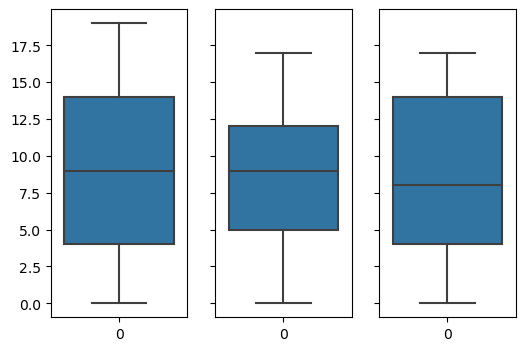

In [10]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 4))
sns.boxplot(data=all_data_part1['pre_since_opened'], ax=axes[0]);
sns.boxplot(data=all_data_part1['pre_since_confirmed'], ax=axes[1])
sns.boxplot(data=all_data_part1['pre_pterm'], ax=axes[2])

<Axes: >

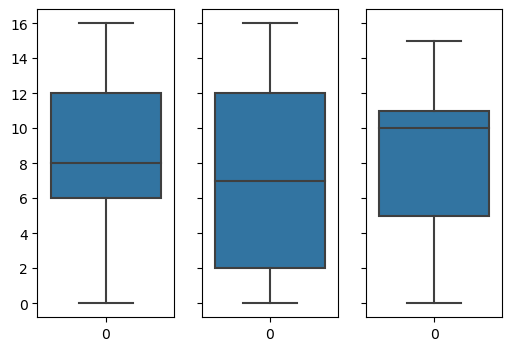

In [13]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 4))
sns.boxplot(data=all_data_part1['pre_fterm'], ax=axes[0]);
sns.boxplot(data=all_data_part1['pre_till_pclose'], ax=axes[1])
sns.boxplot(data=all_data_part1['pre_till_fclose'], ax=axes[2])

<Axes: >

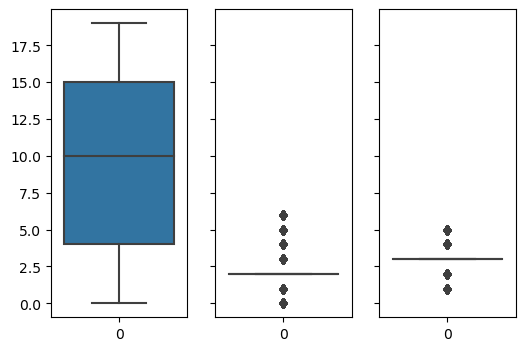

In [14]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 4))
sns.boxplot(data=all_data_part1['pre_loans_credit_limit'], ax=axes[0]);
sns.boxplot(data=all_data_part1['pre_loans_next_pay_summ'], ax=axes[1])
sns.boxplot(data=all_data_part1['pre_loans_outstanding'], ax=axes[2])

<Axes: >

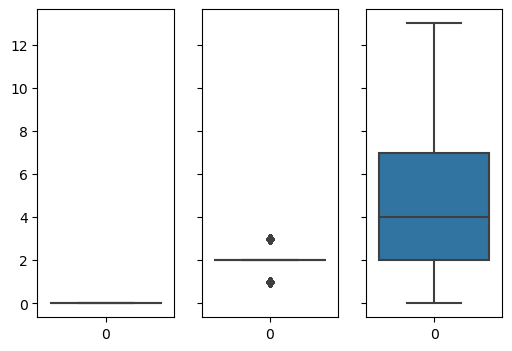

In [15]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 4))
sns.boxplot(data=all_data_part1['pre_loans_total_overdue'], ax=axes[0]);
sns.boxplot(data=all_data_part1['pre_loans_max_overdue_sum'], ax=axes[1])
sns.boxplot(data=all_data_part1['pre_loans_credit_cost_rate'], ax=axes[2])

<Axes: >

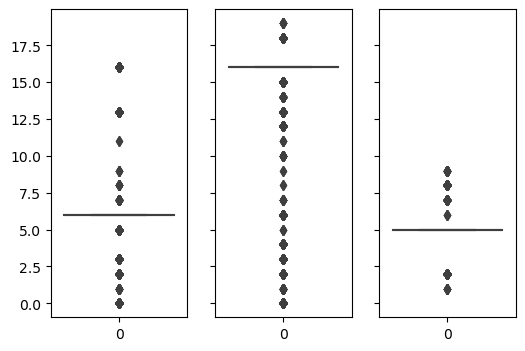

In [16]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 4))
sns.boxplot(data=all_data_part1['pre_loans5'], ax=axes[0]);
sns.boxplot(data=all_data_part1['pre_loans530'], ax=axes[1])
sns.boxplot(data=all_data_part1['pre_loans3060'], ax=axes[2])

<Axes: >

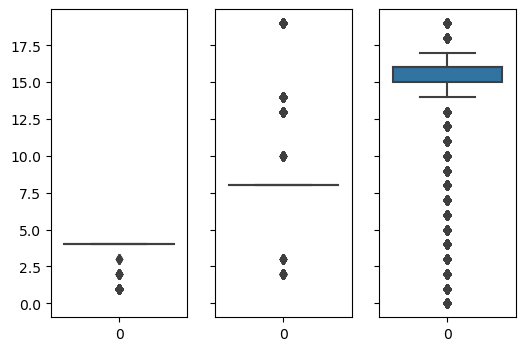

In [17]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 4))
sns.boxplot(data=all_data_part1['pre_loans6090'], ax=axes[0]);
sns.boxplot(data=all_data_part1['pre_loans90'], ax=axes[1])
sns.boxplot(data=all_data_part1['pre_util'], ax=axes[2])

<Axes: >

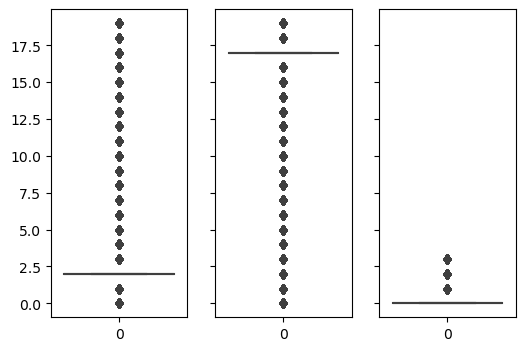

In [18]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 4))
sns.boxplot(data=all_data_part1['pre_over2limit'], ax=axes[0]);
sns.boxplot(data=all_data_part1['pre_maxover2limit'], ax=axes[1])
sns.boxplot(data=all_data_part1['enc_paym_0'], ax=axes[2])

<Axes: >

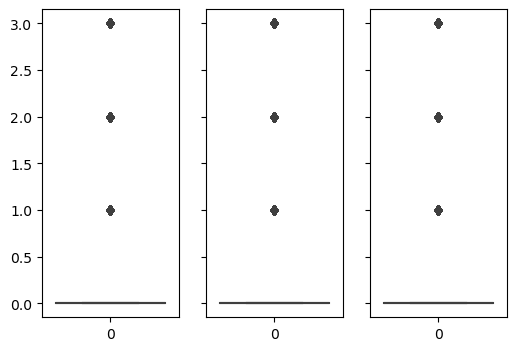

In [19]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 4))
sns.boxplot(data=all_data_part1['enc_paym_1'], ax=axes[0]);
sns.boxplot(data=all_data_part1['enc_paym_2'], ax=axes[1])
sns.boxplot(data=all_data_part1['enc_paym_3'], ax=axes[2])

<Axes: >

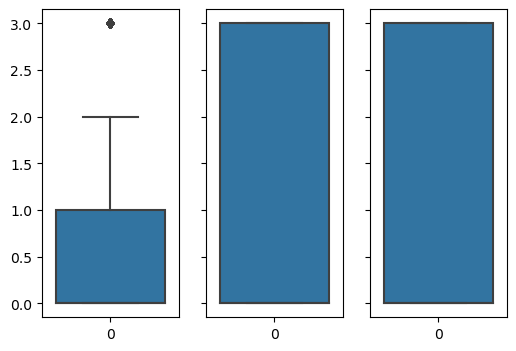

In [9]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(6, 4))
sns.boxplot(data=all_data_part1['enc_paym_4'], ax=axes[0]);
sns.boxplot(data=all_data_part1['enc_paym_5'], ax=axes[1])
sns.boxplot(data=all_data_part1['enc_paym_6'], ax=axes[2])

In [6]:
#I used the function from below to compress dataframes. Saved from other Jupiter notebook because of the dead kernel.
#reduced_data_x = all_data_partx.groupby(['id']).agg(agg_func_count_application)

In [2]:
reduced_data_1 = pd.read_csv('reduced_data_1')
reduced_data_2 = pd.read_csv('reduced_data_2')
reduced_data_3 = pd.read_csv('reduced_data_3')

In [3]:
reduced_data_temp= pd.concat([reduced_data_1, reduced_data_2])
reduced_data = pd.concat([reduced_data_temp, reduced_data_3])

In [4]:
reduced_data.shape

(3000000, 61)

In [5]:
reduced_data.to_csv('summary_data', index=False)

In [6]:
reduced_data.head()

,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,flag
0,10,8.100000,7.600000,7.100000,7.500000,11.400000,10.700000,9.600000,3.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,1.0,0
1,14,11.428571,7.642857,6.642857,7.928571,10.071429,7.000000,8.142857,2.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,1.0,0
2,3,8.333333,10.666667,7.000000,6.000000,5.000000,9.000000,1.666667,1.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,2.0,3.0,1.0,0
3,15,7.000000,7.333333,7.600000,7.800000,5.200000,8.133333,9.866667,2.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,1.0,0
4,1,12.000000,9.000000,4.000000,8.000000,1.000000,11.000000,12.000000,1.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,2.0,3.0,1.0,0


## Data Cleaning

In [14]:
reduced_data[reduced_data.duplicated()]

,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,flag
4171,1,19.0,2.0,17.0,8.0,14.0,11.0,19.0,2.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,2.0,3.0,1.0,0
4379,1,7.0,9.0,4.0,8.0,1.0,11.0,10.0,1.0,2.0,...,4.0,3.0,3.0,3.0,4.0,1.0,2.0,4.0,1.0,0
8579,1,12.0,9.0,4.0,8.0,1.0,11.0,12.0,1.0,4.0,...,4.0,3.0,3.0,3.0,4.0,1.0,2.0,4.0,1.0,0
10841,1,19.0,6.0,4.0,8.0,1.0,11.0,16.0,3.0,2.0,...,4.0,3.0,3.0,3.0,4.0,1.0,2.0,4.0,1.0,0
15661,1,12.0,9.0,4.0,8.0,1.0,11.0,12.0,1.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,2.0,3.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999641,1,16.0,7.0,1.0,16.0,4.0,9.0,19.0,2.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,3.0,3.0,1.0,0
999662,1,2.0,16.0,11.0,13.0,14.0,8.0,14.0,2.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,2.0,3.0,1.0,0
999796,1,16.0,17.0,9.0,12.0,4.0,9.0,6.0,2.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,1.0,0
999815,1,9.0,9.0,4.0,8.0,1.0,11.0,16.0,3.0,3.0,...,4.0,3.0,3.0,3.0,4.0,1.0,2.0,3.0,1.0,0


In [6]:
from IPython.display import Image


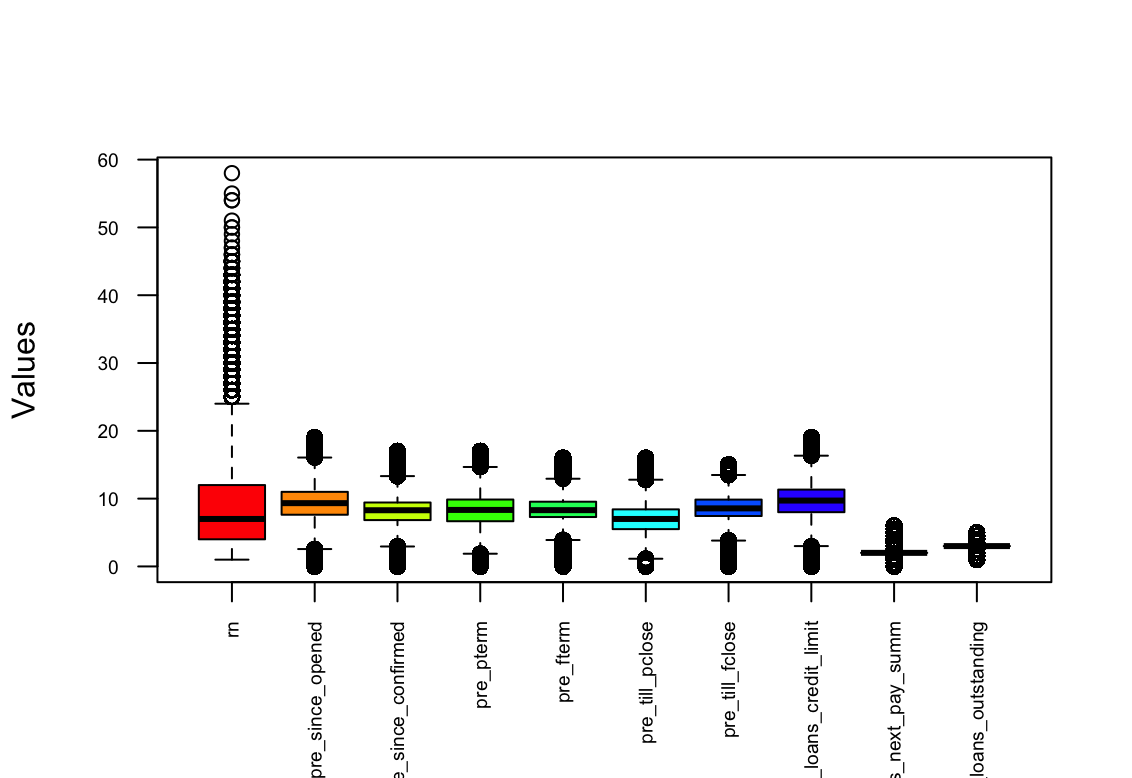

In [9]:
Image('dist_10features.png') 

In [10]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25

    boundaries = (q25 - 1.5*iqr, q75 + 1.5*iqr)
    return boundaries 

In [14]:
first_8_features= reduced_data.columns[0:8]
#second last features do not have a wide spread

In [28]:
last_2_features= reduced_data.columns[8:10]
last_2_features

Index(['pre_loans_next_pay_summ', 'pre_loans_outstanding'], dtype='object')

In [25]:
for i in range(len(first_8_features)):
    boundaries = calculate_outliers(reduced_data[first_8_features[i]])
    is_outlier_1 = (reduced_data[first_8_features[i]] < boundaries[0]) 
    is_outlier_2 = (reduced_data[first_8_features[i]] > boundaries[1]) 
    if len(is_outlier_1) == 0:
        reduced_data.loc[is_outlier_2, first_8_features[i]] = int( boundaries[1])
    reduced_data.loc[is_outlier_1, first_8_features[i]] = int(boundaries[0])
    reduced_data.loc[is_outlier_2, first_8_features[i]] = int(boundaries[1])

In [30]:
reduced_data['pre_loans_next_pay_summ'].value_counts()

pre_loans_next_pay_summ
2.0    2397802
3.0     134202
4.0      86549
2.5      79648
1.0      71570
5.0      60065
3.5      52905
1.5      41382
6.0      33088
0.0      28563
4.5       8583
0.5       3902
5.5       1741
Name: count, dtype: int64

In [32]:
reduced_data.shape

(3000000, 61)

In [33]:
# 80% is pretty many values of "2", but in case I left it
2397802/3000000

0.7992673333333333

In [34]:
reduced_data['pre_loans_outstanding'].value_counts()

pre_loans_outstanding
3.0    2635992
4.0      96435
2.0      85830
3.5      63659
2.5      57236
5.0      27806
1.0      22885
4.5       5560
1.5       4597
Name: count, dtype: int64

In [35]:
2635992/3000000

0.878664

In [36]:
#OK, do it again
for i in range(len(last_2_features)):
    boundaries = calculate_outliers(reduced_data[last_2_features[i]])
    is_outlier_1 = (reduced_data[last_2_features[i]] < boundaries[0]) 
    is_outlier_2 = (reduced_data[last_2_features[i]] > boundaries[1]) 
   
    reduced_data.loc[is_outlier_1, last_2_features[i]] = int(boundaries[0])
    reduced_data.loc[is_outlier_2, last_2_features[i]] = int(boundaries[1])

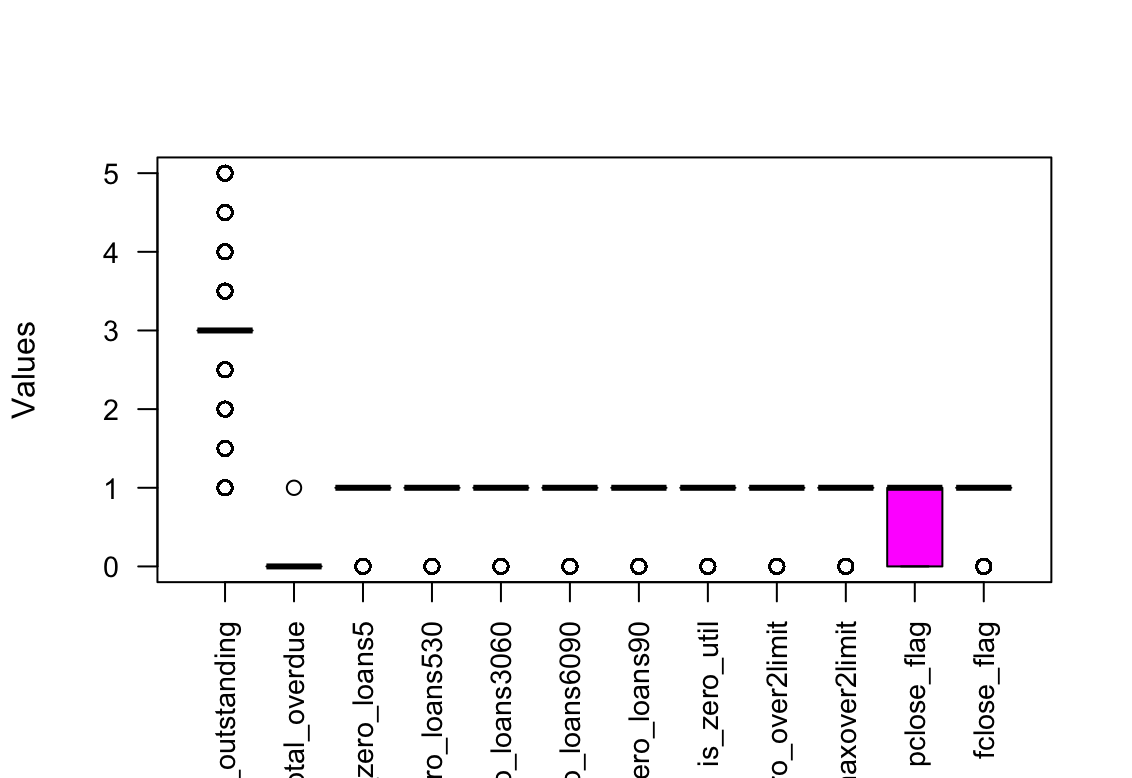

In [37]:
Image('another_10_features.png') 
#It looks very much like these meanings are all the same and they don't make sense.

In [46]:
features_10_next = reduced_data.columns[11:21]

In [50]:
reduced_data.columns[11:21]

Index(['is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'is_zero_util',
       'is_zero_over2limit', 'is_zero_maxover2limit', 'pclose_flag',
       'fclose_flag'],
      dtype='object')

In [59]:
for i in range(len(features_10_next)):
    if min(reduced_data[features_10_next[i]].value_counts())/max(reduced_data[features_10_next[i]].value_counts()) < 0.1:
        reduced_data.pop(features_10_next[i])

In [60]:
reduced_data.shape

(3000000, 53)

In [63]:
reduced_data.columns

Index(['rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue', 'pclose_flag',
       'fclose_flag', 'pre_loans_max_overdue_sum',
       'pre_loans_credit_cost_rate', 'pre_loans5', 'pre_loans530',
       'pre_loans3060', 'pre_loans6090', 'pre_loans90', 'pre_util',
       'pre_over2limit', 'pre_maxover2limit', 'enc_paym_0', 'enc_paym_1',
       'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6',
       'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11',
       'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15',
       'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19',
       'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23',
       'enc_paym_24', 'enc_loans_account_holder_type',
       'enc_loans_credit_status', 'enc_loans_credit_type',
       '

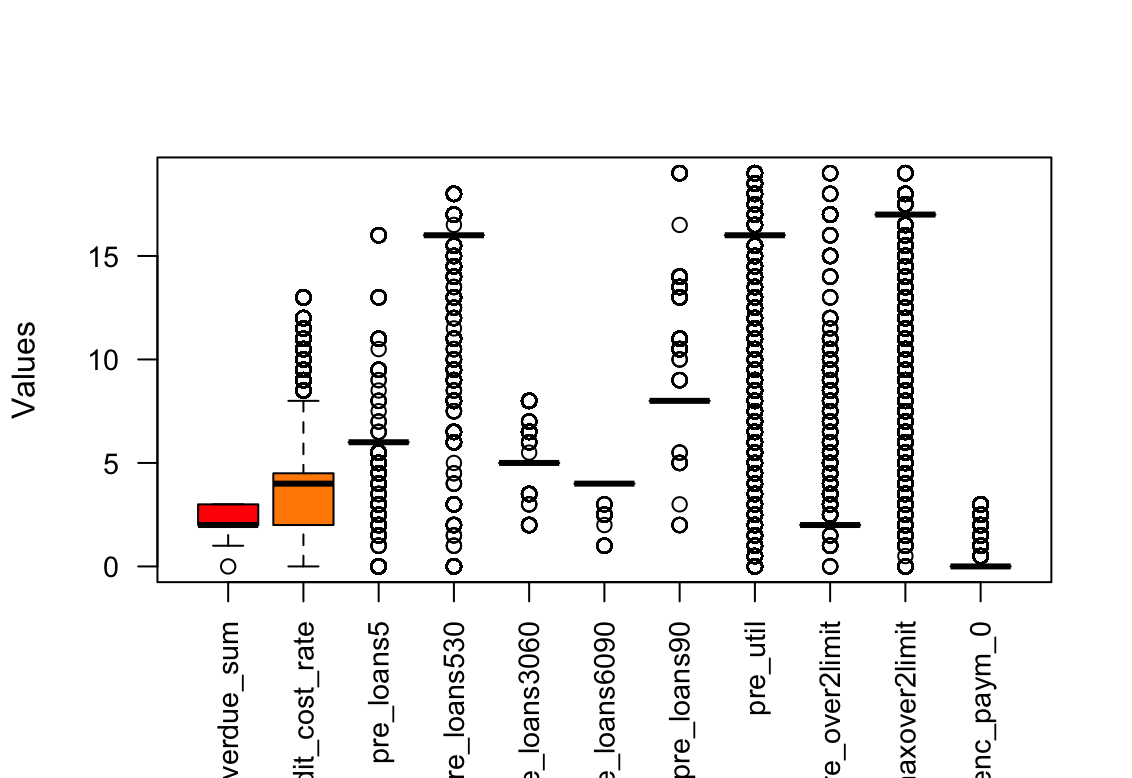

In [64]:
Image('next_10.png') 


In [72]:
reduced_data.columns[13:24]

Index(['pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'enc_paym_0'],
      dtype='object')

In [79]:
next_10_features= reduced_data.columns[13:24]


In [80]:
for i in range(len(next_10_features)):
    if max(reduced_data[next_10_features[i]].value_counts())/3000000 > 0.95:
        reduced_data.pop(next_10_features[i])

In [83]:
last_2_features=['pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate']

In [84]:
for i in range(len(last_2_features)):
    boundaries = calculate_outliers(reduced_data[last_2_features[i]])
    is_outlier_1 = (reduced_data[last_2_features[i]] < boundaries[0]) 
    is_outlier_2 = (reduced_data[last_2_features[i]] > boundaries[1]) 
    if len(is_outlier_1) == 0:
        reduced_data.loc[is_outlier_2, last_2_features[i]] = int( boundaries[1])
    elif(len(is_outlier_2) == 0):
        reduced_data.loc[is_outlier_1, last_2_features[i]] = int( boundaries[0])
    else:
        reduced_data.loc[is_outlier_1, last_2_features[i]] = int(boundaries[0])
        reduced_data.loc[is_outlier_2, last_2_features[i]] = int(boundaries[1])

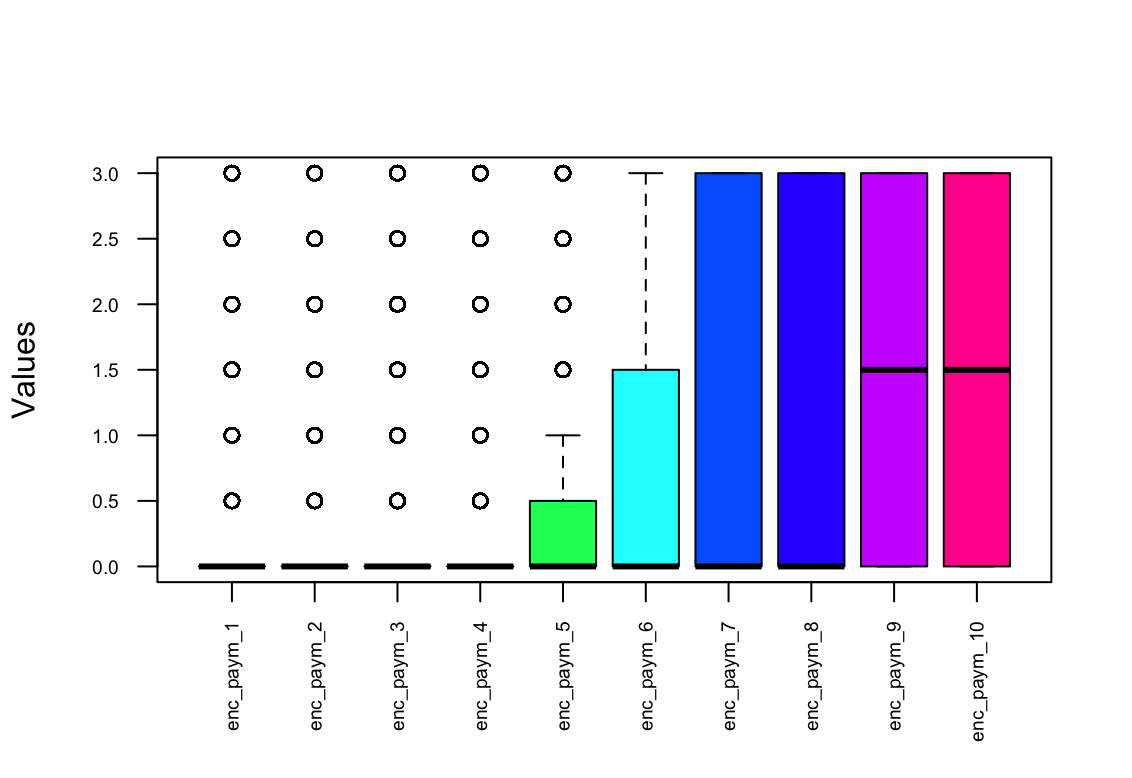

In [87]:
Image('next_10_2.png') 


In [90]:
reduced_data.columns[16:26]

Index(['enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5',
       'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10'],
      dtype='object')

In [92]:
reduced_data.shape

(3000000, 45)

In [93]:
next_10_features= reduced_data.columns[16:26]

In [94]:
for i in range(len(next_10_features)):
    if max(reduced_data[next_10_features[i]].value_counts())/3000000 > 0.95:
        reduced_data.pop(next_10_features[i])

In [98]:
next_5_features= reduced_data.columns[16:21]

In [99]:
for i in range(len(next_5_features)):
    boundaries = calculate_outliers(reduced_data[next_5_features[i]])
    is_outlier_2 = (reduced_data[next_5_features[i]] > boundaries[1]) 
    reduced_data.loc[is_outlier_2, next_5_features[i]] = int(boundaries[1])

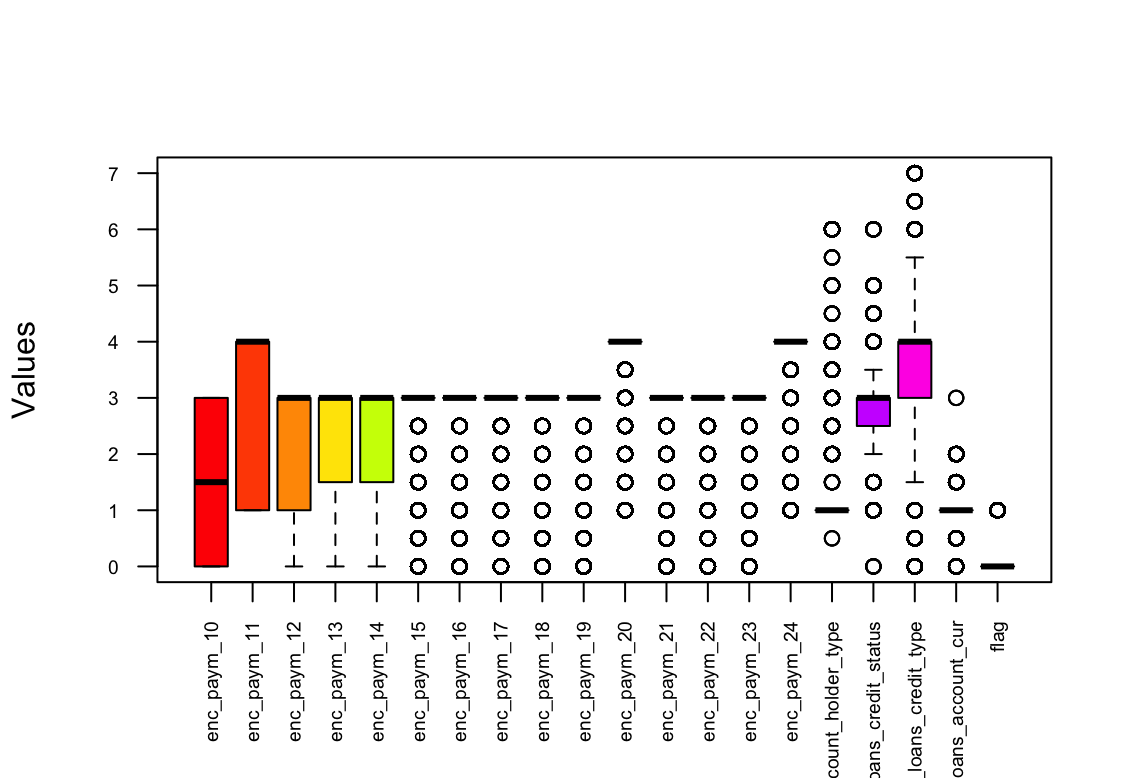

In [100]:
Image('last_features.png') 


In [104]:
reduced_data.columns[30:44]

Index(['enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18',
       'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22',
       'enc_paym_23', 'enc_paym_24', 'enc_loans_account_holder_type',
       'enc_loans_credit_status', 'enc_loans_credit_type',
       'enc_loans_account_cur'],
      dtype='object')

In [105]:
last_features= reduced_data.columns[30:44]

In [106]:
for i in range(len(last_features)):
    if max(reduced_data[last_features[i]].value_counts())/3000000 > 0.95:
        reduced_data.pop(last_features[i])

In [107]:
reduced_data.shape

(3000000, 43)

In [108]:
reduced_data.columns

Index(['rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue', 'pclose_flag',
       'fclose_flag', 'pre_loans_max_overdue_sum',
       'pre_loans_credit_cost_rate', 'pre_util', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24',
       'enc_loans_credit_status', 'enc_loans_credit_type', 'flag'],
      dtype='object')

In [113]:
last_features_new = reduced_data.columns[30:42]

In [114]:
for i in range(len(last_features_new)):
    boundaries = calculate_outliers(reduced_data[last_features_new[i]])
    is_outlier_1 = (reduced_data[last_features_new[i]] < boundaries[0]) 
    is_outlier_2 = (reduced_data[last_features_new[i]] > boundaries[1]) 
    if len(is_outlier_1) == 0:
        reduced_data.loc[is_outlier_2, last_features_new[i]] = int( boundaries[1])
    elif(len(is_outlier_2) == 0):
        reduced_data.loc[is_outlier_1, last_features_new[i]] = int( boundaries[0])
    else:
        reduced_data.loc[is_outlier_1, last_features_new[i]] = int(boundaries[0])
        reduced_data.loc[is_outlier_2, last_features_new[i]] = int(boundaries[1])

In [119]:
reduced_data.to_csv('clean_data_clients', index=False)